Подробное теоретическое описание довольно объёмное, поэтому находится в прикреплённом файле.

## Монте-Карло

1. Задаём координаты звёзд равнораспределённо по z.
Реализуем рассчёт в параллелепипеде. Разобьём рассчётный параллелепипед (x, y, z) на кубики по 1 пк.

1.2. Задаём координаты звёзд особым образом.

2. Задаём распределение пыли в ячейках.

In [ ]:
# Задаём звёзды
import numpy as np
#import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

stars_number=1000
N = stars_number
size=100
x_length=size
y_width =size
z_height=size
def scale (vector, size):
    return (vector*2-1)*size

def scale_exp (vector, size):
    return (np.log(vector)*2)#*size


x_stars = scale(np.random.rand(N), x_length)
y_stars = scale(np.random.rand(N), y_width)
z_stars = scale(np.random.rand(N), z_height)
#print(z_stars)
stars_polar_r=np.zeros(stars_number)
stars_polar_theta=np.zeros(stars_number)
stars_polar_phi=np.zeros(stars_number)
def to_polar(z, x, y):
    r=np.sqrt(x**2+y**2+z**2)
    if z==0:
        theta=np.pi/2
    else:
        theta=np.arctan(np.sqrt(x**2+y**2)/z)
    if x==0:
        phi=np.pi/2
    else:
        phi=np.arctan(y/x)
    return (r, theta, phi)
#print(to_polar(1, 10, 10))
    
for i in range(stars_number):
#     stars_polar_r[i]=np.sqrt(x_stars[i]**2+y_stars[i]**2+z_stars[i]**2)
#     stars_polar_theta[i]=np.arctan(np.sqrt(x_stars[i]**2+y_stars[i]**2)/z_stars[i])
#     stars_polar_phi[i]=np.arctan(y_stars[i]/x_stars[i])
    stars_polar_r[i], stars_polar_theta[i], stars_polar_phi[i] = to_polar(z_stars[i], x_stars[i], y_stars[i])
print(stars_polar_r)



In [ ]:
# %matplotlib notebook
# from mpl_toolkits.mplot3d import axes3d

# stars = plt.figure(".")
# ax = stars.add_subplot(111, projection='3d')
# ax.scatter(x_stars, y_stars, z_stars)
# ax.set_xlim(-x_length, x_length)
# ax.set_ylim(-y_width, y_width)
# ax.set_zlim(-z_height, z_height)
# plt.show()

Зададим плотность пыли как убывающую экспоненциально.

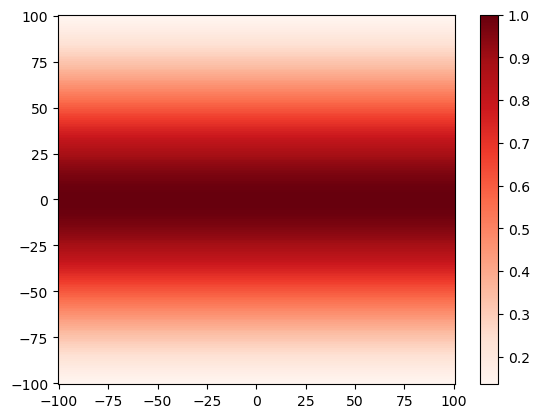

In [39]:
# а теперь сделаем трёхмерный массив, в котором будем брать проекцию
# Пыль в кубе от -100 до 100
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-x_length, x_length, 2*x_length+1)

y=np.linspace(-y_width, y_width, 2*y_width+1)
z=np.linspace(-z_height, z_height, 2*z_height+1)
#print(x)
#print(y)
def gauss(x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))

def density_function (z, vector):
    return gauss(z, 1, 0, size/2)
    #b=1/size
    #return (np.exp(-b*abs(z)))*vector
    #return vector
first = np.ones((2*z_height+1, 2*x_length+1, 2*y_width+1))
dust=np.zeros((2*z_height+1, 2*x_length+1, 2*y_width+1))
for z_pointer in range(-z_height, z_height+1):
    #print(z_pointer, density_function(z_pointer, first[z_pointer]))
    dust[z_pointer+z_height] = density_function(z_pointer, first[z_pointer])
    #print(z_pointer, dust[z_pointer+z_height][0][0])
#print(dust)
slice_z=dust[:, :, 0]#, :]
#print(slice_z)
#np.log(dust)
plt.pcolor(x, z, slice_z, cmap="Reds")
plt.colorbar()
# print(np.shape(x))
# print(np.shape(z))
# print(np.shape(slice_z))

In [ ]:
# Интегрирование по лучу зрения
import math as m
def n_fill():    
    #print(stars_polar_r)
    n_arr=np.zeros(stars_number)
    for a in range(stars_number):
        star=np.arange(3)
        star[0]=z_stars[a]#z
        star[1]=x_stars[a]#x
        star[2]=y_stars[a]#y
        star_distance=stars_polar_r[a]
        n_discretization=int(np.round(star_distance*10))
        element_length=star_distance/n_discretization
        coordinates_array=np.linspace(0, star_distance, n_discretization)
        optical_density=0
        star2=star/star_distance
        #print(star2)
        optical_density=0
        for i in coordinates_array:
            coord1=star2*i #z
            coord2=np.floor(coord1) #z
            #print(coord1, coord2)
            #print(dust[int(coord2[0])][int(coord2[1])][int(coord2[2])]*element_length)
            optical_density+=dust[int(coord2[0]+z_height)][int(coord2[1]+x_length)][int(coord2[2]+y_width)]*element_length
            #print(optical_density)
        n_arr[a]=optical_density
    return n_arr
#print(n_arr)
n_phys=n_fill()
print(n_phys)

In [ ]:
# Решение СЛАУ
import scipy.linalg as sla
import numpy as np


cosT=np.cos(stars_polar_theta)
sinT=np.sin(stars_polar_theta)
cosF=np.cos(stars_polar_phi)
sinF=np.sin(stars_polar_phi)

# Задали. Составляем матрицу B:
m_num_of_coef=10
#B=np.zeros((stars_number, m_num_of_coef))
#print(B)

def B_string(r, theta, phi):
    B_str=np.zeros(m_num_of_coef)
    B_str[0]= r
    B_str[1]= np.sqrt(3)/2*r**2*np.cos(theta)
    B_str[2]=-np.sqrt(6)/2*r**2*np.sin(theta)*np.cos(phi)
    B_str[3]= np.sqrt(6)/2*r**2*np.sin(theta)*np.sin(phi)
    B_str[4]= 1/3*r**3
    B_str[5]= np.sqrt(5)/6*r**3*(3*np.cos(theta)**2-1)
    B_str[6]=-np.sqrt(5/6)*r**3*np.sin(2*theta)*np.cos(phi)
    B_str[7]= np.sqrt(5/6)*r**3*np.sin(2*theta)*np.sin(phi)
    B_str[8]= np.sqrt(5/6)*r**3*np.sin(theta)**2*np.cos(2*phi)
    B_str[9]=-np.sqrt(5/6)*r**3*np.sin(theta)**2*np.sin(2*phi)
    return B_str

def B_fill(stars_number, m_num_of_coef):
    B=np.zeros((stars_number, m_num_of_coef))
    for a in range(stars_number):
        B[a]=B_string(stars_polar_r[a], stars_polar_theta[a], stars_polar_phi[a])
        
        #B=B/np.sqrt(4*np.pi) !!!! Работает неправильно!
    return B/np.sqrt(4*np.pi)
B=B_fill(stars_number, m_num_of_coef)
#print(B)
# Интегрированиеы

#n_phys=n_fill()
#print(n_phys)
#B.shape
#n_phys.shape
A_lstsq=sla.lstsq(B, n_phys)
A=A_lstsq[0]
err=A_lstsq[1]
print(A)
print(err)
result=np.dot(B, A)
print(result)
def sq_sum(x):
    sq_sum=0;
    for i in x:
        sq_sum+=i**2
    return sq_sum
sq_sum_res=sq_sum(result-n_phys)
sq_sum_n_phys=sq_sum(n_phys)
print(sq_sum(result-n_phys))
print(sq_sum(n_phys))
rel_err_lstsq=sq_sum_res/sq_sum_n_phys
print("r(относительная невязка МНК):", rel_err_lstsq)

# n_fillphys
# sq_sum

In [ ]:
# Восстановление концентрации z,x,y
def refill_n(r, theta, phi):
    n=0
    n+=A[0]
    n+=np.sqrt(3)*r*np.cos(theta)*A[1]
    n-=np.sqrt(6)*r*np.sin(theta)*(A[2]*np.cos(phi)-A[3]*np.sin(phi))
    n+= r**2*A[4]
    n+= np.sqrt(5)/2*r**2*(3*np.cos(theta)**2-1)*A[5]
    n+=-3*np.sqrt(5/6)*r**2*np.sin(2*theta)*np.cos(phi)*A[6]
    n+= 3*np.sqrt(5/6)*r**2*np.sin(2*theta)*np.sin(phi)*A[7]
    n+= 3*np.sqrt(5/6)*r**2*np.sin(theta)**2*np.cos(2*phi)*A[8]
    n+=-3*np.sqrt(5/6)*r**2*np.sin(theta)**2*np.sin(2*phi)*A[9]
    return n/np.sqrt(4*np.pi)

needed_y_projections=[-y_width, 0, y_width]

dust_refill=np.zeros((2*z_height+1, 2*x_length+1, 2*y_width+1))
dust_diff=  np.zeros((2*z_height+1, 2*x_length+1, 2*y_width+1))
sum_dust=0
sum_dust_refill=0
sum_dust_refill=0
sq_sum_dust_diff=0
relative_deviation_sum=0
sq_relative_deviation_sum=0
rel_dev=0
for z_pointer in range(-z_height, z_height+1):
    for x_pointer in range(-x_length, x_length+1):
#         y_pointer=0
#         r, theta, phi = to_polar(z_pointer, x_pointer, y_pointer)
#         dust_refill[z_pointer+z_height][x_pointer+x_length][y_pointer+y_width] = refill_n(r, theta, phi)
        for y_pointer in range(-y_width, y_width+1):
#       for y_pointer in needed_y_projections:
            r, theta, phi = to_polar(z_pointer, x_pointer, y_pointer)
            dust_refill[z_pointer+z_height][x_pointer+x_length][y_pointer+y_width] = refill_n(r, theta, phi)
            dust_diff  [z_pointer+z_height][x_pointer+x_length][y_pointer+y_width]=dust_refill[z_pointer+z_height][x_pointer+x_length][y_pointer+y_width]-dust[z_pointer+z_height][x_pointer+x_length][y_pointer+y_width]
            sum_dust+=dust[z_pointer+z_height][x_pointer+x_length][y_pointer+y_width]
            sum_dust_refill+=dust_refill[z_pointer+z_height][x_pointer+x_length][y_pointer+y_width]
            sq_sum_dust_diff+=dust_diff[z_pointer+z_height][x_pointer+x_length][y_pointer+y_width]**2
            rel_dev=dust_diff[z_pointer+z_height][x_pointer+x_length][y_pointer+y_width]/dust[z_pointer+z_height][x_pointer+x_length][y_pointer+y_width]
            relative_deviation_sum+=abs(rel_dev)
            sq_relative_deviation_sum+=(rel_dev)**2
    print(z_pointer, dust_refill[z_pointer+z_height][x_length][y_width])
number_of_cells=(2*z_height+1)*(2*x_length+1)*(2*y_width+1)
dust_refill_mean=sum_dust_refill/number_of_cells
sq_dev_mean=np.sqrt(sq_sum_dust_diff/number_of_cells)
print("среднее значение n_восстановленное=", dust_refill_mean, "+-", sq_dev_mean, "(сред. кв. откл.)")
relative_deviation_mean=relative_deviation_sum/number_of_cells
print("Средняя относительная погрешность=", relative_deviation_mean)
sq_relative_deviation_mean=np.sqrt(sq_relative_deviation_sum/number_of_cells)
print("Среднеквадратичная относительная погрешность=", sq_relative_deviation_mean)

r(относительная невязка МНК): 8.385506023023104e-05
,среднее значение n_восстановленное= 0.5858566016499258 +- 0.051388398982122635 (сред. кв. откл.)
,Средняя относительная погрешность= 0.13578454087377545
,Среднеквадратичная относительная погрешность= 0.2998987132788476


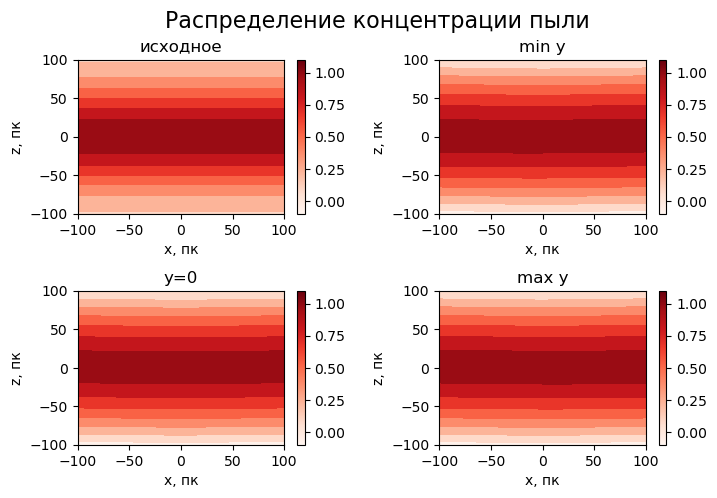

In [96]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm
param = {'vmin':-0.1,'vmax':1.1}
fig=plt.figure(figsize=(8, 5))
fig.suptitle('Распределение концентрации пыли', fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.5)

ax = fig.add_subplot(221)
ax.contourf(x, z, slice_z, cmap="Reds",**param)
fig.colorbar(cm.ScalarMappable(Normalize(**param),cmap="Reds"), ax=ax)
ax.set_title("исходное")
ax.set_xlabel("x, пк")
ax.set_ylabel("z, пк")



slice_z_ref1=dust_refill[:, :, 0]#, :]
ax = fig.add_subplot(222)
ax.contourf(x, z, slice_z_ref1, cmap="Reds",**param)
fig.colorbar(cm.ScalarMappable(Normalize(**param),cmap="Reds"), ax=ax)
ax.set_title("min y")
ax.set_xlabel("x, пк")
ax.set_ylabel("z, пк")


slice_z_ref2=dust_refill[:, :, size]#, :]
ax = fig.add_subplot(223)
ax.contourf(x, z, slice_z_ref2, cmap="Reds",**param)
fig.colorbar(cm.ScalarMappable(Normalize(**param),cmap="Reds"), ax=ax)
ax.set_title("y=0")
ax.set_xlabel("x, пк")
ax.set_ylabel("z, пк")


slice_z_ref3=dust_refill[:, :, 2*size]#, :]
ax = fig.add_subplot(224)
ax.contourf(x, z, slice_z_ref3, cmap="Reds",**param)
fig.colorbar(cm.ScalarMappable(Normalize(**param),cmap="Reds"), ax=ax)
ax.set_title("max y")
ax.set_xlabel("x, пк")
ax.set_ylabel("z, пк")


# ax.pcolormesh(self.x[i1x:i2x:STEP], self.y[i1y:i2y:STEP], ZZ ,cmap=cmap, **param)#z[i1y:i2y,
# i1x:i2x, 0]
# fig.colorbar(cm.ScalarMappable(Normalize(**param),cmap=cmap),pad=0.01,ax=ax,aspect=50,shrink
# =1) # Построение линейки плотности справа
print("r(относительная невязка МНК):", rel_err_lstsq)
print("среднее значение n_восстановленное=", dust_refill_mean, "+-", sq_dev_mean, "(сред. кв. откл.)")
print("Средняя относительная погрешность=", relative_deviation_mean)
print("Среднеквадратичная относительная погрешность=", sq_relative_deviation_mean)